# In this tutorial, we will used autodp to compare the privacy guarantees of commonly used DP mechanisms.

1. The mechanisms being considered are: Randomized Response,  Laplace Mechanism and Gaussian mechanism.

2. We will align their parameters such that they all satisfy $\rho$-zCDP for the same parameter $\rho = 1$.

3. We will compare their privacy guarantees in terms of their Renyi-DP, f-DP (Tradeoff function) and their $\epsilon,\delta$)-DP (Privacy profiles).

In [1]:
from autodp.mechanism_zoo import ExactGaussianMechanism, PureDP_Mechanism
from autodp.transformer_zoo import Composition
from autodp.mechanism_zoo import GaussianMechanism, RandresponseMechanism, LaplaceMechanism
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

## 0. Declare the mechanisms using autodp

In [2]:
# Let's now choose the parameters of these mechanisms 
# and declare them as Mechanism objects using autodp
eps = 1
sigma = 1.0 / eps
p = np.exp(eps)/(1+np.exp(eps))
b = 1.0/eps

gm3 = ExactGaussianMechanism(sigma,name='GM')
rr = RandresponseMechanism(p, name='RandResponse')

laplace = LaplaceMechanism(b,name='Laplace')

label_list = ['GM','RR','Laplace']


## 1. Compare the RDP curves

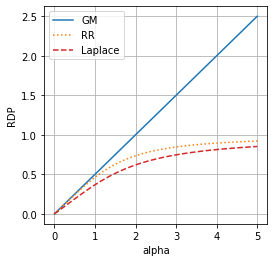

In [3]:
alpha_list1, RDP_list1 = gm3.plot_RDP(alphamax=5, length=101)
#alpha_list3, RDP_list3 = gm3.plot_RDP(alphamax=5,length=101)
alpha_list2, RDP_list2 = rr.plot_RDP(alphamax=5,length=101)
alpha_list3, RDP_list3 = laplace.plot_RDP(alphamax=5,length=101)
#alpha_list5, RDP_list5 = rr2.plot_RDP(alphamax=5,length=101)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


plt.figure(figsize=(4,4))
plt.plot(alpha_list1,RDP_list1)
plt.plot(alpha_list2, RDP_list2 ,':')
plt.plot(alpha_list3, RDP_list3,'--',color=colors[3])
#plt.plot(alpha_list5, RDP_list5,'--')
plt.legend(label_list)
plt.xlabel('alpha')
plt.ylabel('RDP')
plt.grid()
plt.savefig('rdp_comparisons_common_mechanism.pdf')
plt.show()

**Remark**:  They all satisfy $1$-zCDP since the RDP curves are all bounded by $\alpha /2$.

## 2. Compare the f-DP curves (Tradeoff functions)

/usr/local/lib/python3.8/site-packages/scipy/optimize/_optimize.py:2782: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


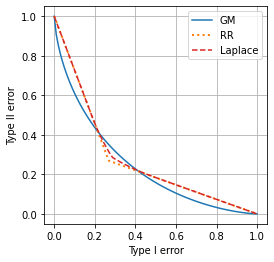

In [4]:
fpr_list1, fnr_list1 = gm3.plot_fDP()
fpr_list2, fnr_list2 = rr.plot_fDP()
fpr_list3, fnr_list3 = laplace.plot_fDP()

plt.figure(figsize=(4,4))
plt.plot(fpr_list1,fnr_list1)
plt.plot(fpr_list2, fnr_list2,':',linewidth=2)
plt.plot(fpr_list3, fnr_list3,'--',color='#d62728')

plt.legend(label_list)
plt.xlabel('Type I error')
plt.ylabel('Type II error')
plt.grid()
plt.savefig('fdp_common_mechanisms.pdf')
plt.show()

**Remark**:  Notice that both RR and Laplace satisfy the same pure-DP bound, but Laplace mechanism's tradeoff function is slightly stronger than RR.  This is not surprising as we know that RR is the "worst" pure DP mechanism. In contrary, GM's f-DP is not compatible to the other two. It satisfies Gaussian-DP instead.

## 3. Compare the $(\epsilon,\delta)$-DP curves (privacy profiles, i.e., $\delta$ as a function of $\epsilon$.)

/usr/local/lib/python3.8/site-packages/scipy/optimize/_optimize.py:2782: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


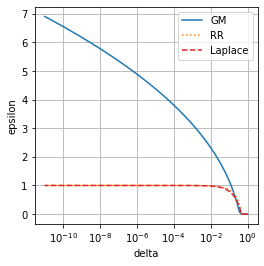

In [5]:
delta_list = 10.0**np.array(-np.linspace(0,11,100))
eps_list_gm = np.zeros_like(delta_list)
eps_list_rr = np.zeros_like(delta_list)
eps_list_laplace = np.zeros_like(delta_list)
for i,delta in enumerate(delta_list):
    eps_list_gm[i] = gm3.approxDP(delta)
    eps_list_rr[i] = rr.approxDP(delta)
    eps_list_laplace[i] = laplace.approxDP(delta)
    #print(eps_list_gm3[i],eps_list_gm1[i])
    
label_list2 = ['GM', 'RR','Laplace']
plt.figure(figsize=(4,4))

plt.plot(delta_list,eps_list_gm)
#plt.plot(alpha_list3, RDP_list3 ,':')
plt.plot(delta_list,eps_list_rr,':')
plt.plot(delta_list, eps_list_laplace,'--',color=colors[3])
#plt.plot(alpha_list5, RDP_list5,'--')
plt.xscale('log')
plt.legend(label_list2)
plt.xlabel('delta')
plt.ylabel('epsilon')
plt.grid()
plt.savefig('dp_comparisons_common_mechanism.pdf')
plt.show()

**Remark**: clearly GM gives a much larger approx-DP bounds comparing to their pure-DP alternatives whenever $\delta$ is small. How about when $\delta$ is slightly larger? Let's change the horizontal axis to a linear scale, so larger $\delta$s are more obvious.

/usr/local/lib/python3.8/site-packages/scipy/optimize/_optimize.py:2782: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


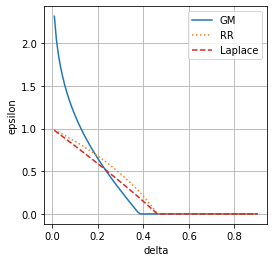

In [6]:
delta_list = np.linspace(0.01,0.9,100)
eps_list_gm = np.zeros_like(delta_list)
eps_list_rr = np.zeros_like(delta_list)
eps_list_laplace = np.zeros_like(delta_list)
for i,delta in enumerate(delta_list):
    eps_list_gm[i] = gm3.approxDP(delta)
    eps_list_rr[i] = rr.approxDP(delta)
    eps_list_laplace[i] = laplace.approxDP(delta)
    #print(eps_list_gm3[i],eps_list_gm1[i])
    
label_list2 = ['GM', 'RR','Laplace']
plt.figure(figsize=(4,4))

plt.plot(delta_list,eps_list_gm)
#plt.plot(alpha_list3, RDP_list3 ,':')
plt.plot(delta_list,eps_list_rr,':')
plt.plot(delta_list, eps_list_laplace,'--',color=colors[3])
#plt.plot(alpha_list5, RDP_list5,'--')
plt.legend(label_list2)
plt.xlabel('delta')
plt.ylabel('epsilon')
plt.grid()
plt.savefig('dp_comparisons_common_mechanism_linscale.pdf')
plt.show()

**Remark**:  Clearly, there is a region where GM outperformss RR and Laplace, and Laplace mechanism is always more private than RR for all $\delta>0$ when both are calibrated to satisfy the same pure-DP (or zCDP).